<a href="https://colab.research.google.com/github/laurenwisniewski/DS3001-labs/blob/main/04_hedonic_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.



In [4]:
! git clone https://github.com/DS3001/labs

Cloning into 'labs'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 80 (delta 28), reused 30 (delta 18), pack-reused 31 (from 1)
Receiving objects: 100% (80/80), 20.54 MiB | 21.42 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [5]:
import pandas as pd
airbnb_data = pd.read_csv('labs/04_hedonic_pricing/airbnb_hw.csv')
airbnb_data.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [6]:
price = airbnb_data['Price']
price = price.str.replace(',','') # Replace commas with nothing
price = price.str.replace('$','') # Replace dollar signs with nothing
price = pd.to_numeric(price,errors='coerce') # Typecast price to float/numeric
airbnb_data['Price'] = price

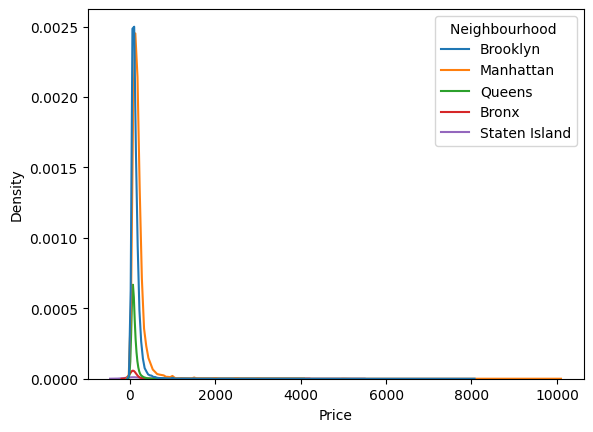

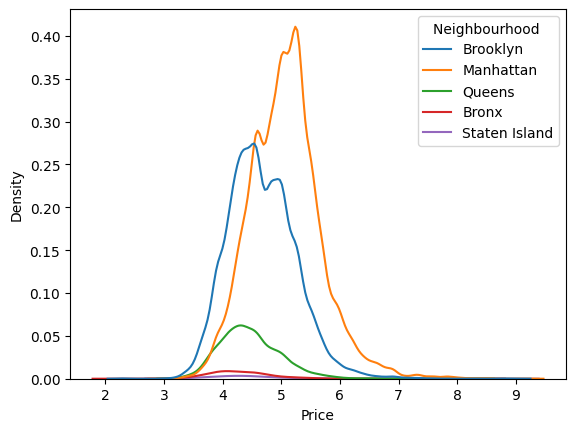

In [7]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.kdeplot(x = airbnb_data['Price'], hue = airbnb_data['Neighbourhood '])
plt.show()

sns.kdeplot(x = np.log(airbnb_data['Price']), hue = airbnb_data['Neighbourhood '])
plt.show()

2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

3. Implement an ~80/~20 train-test split. Put the test data aside.

In [9]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = airbnb_data['Price']
X = airbnb_data.loc[:,['Review Scores Rating', 'Neighbourhood '] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?

5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?

6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?

7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.